In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df = pd.read_csv('weight_to_height.csv',sep=';')

In [8]:
df.head()

,Weight,Height
0,40,120
1,60,160
2,71,170
3,45,130
4,50,140


Text(0, 0.5, 'Height')

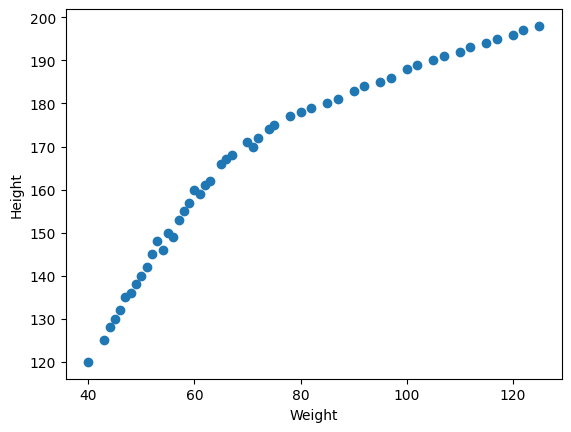

In [11]:
## scatter plots
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [13]:
## corelation
df.corr()

,Weight,Height
Weight,1.000000,0.949508
Height,0.949508,1.000000


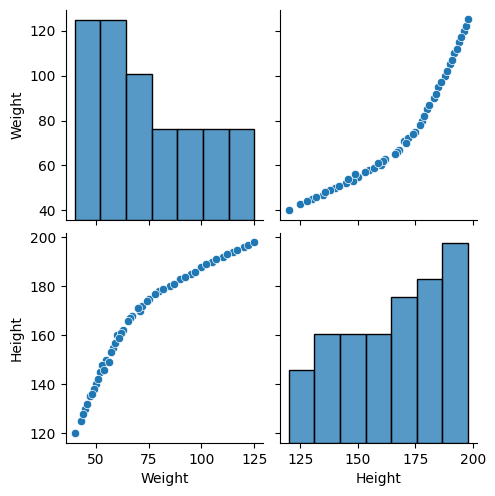

In [14]:
import seaborn as sns
sns.pairplot(df)

In [18]:
## independent and dependent features
x= df[['Weight']] ## independet future as a data frame, you need double brackets or it will be a series not a df
np.array(x).shape

(50, 1)

In [19]:
y=df['Height'] # dependet feature can be a series or 1d array

In [20]:
#Train test Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
X_train.shape

(37, 1)

In [25]:
## standarization
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [27]:
X_test = scaler.transform(X_test)

In [28]:
X_test

array([[ 0.82927177],
       [ 2.34181676],
       [ 0.4835472 ],
       [-0.72648879],
       [ 1.69358319],
       [-0.42397979],
       [-0.20790194],
       [-0.38076422],
       [ 0.91570291],
       [ 2.12573891],
       [ 0.61319391],
       [-0.89935108],
       [ 1.99609219]])

In [29]:
# apply simple linear Regression
from sklearn.linear_model import LinearRegression

In [31]:
regression = LinearRegression(n_jobs=-1)

In [32]:
regression.fit(X_train,Y_train)

LinearRegression(n_jobs=-1)

In [33]:
print("Coefficient or slope ",regression.coef_)
print("intercept ",regression.intercept_)

Coefficient or slope  [21.13711781]
intercept  162.43243243243242


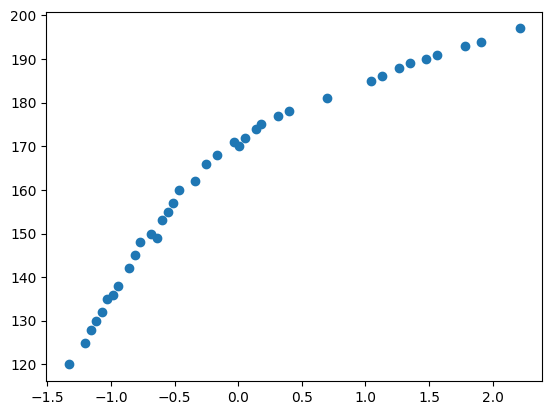

In [34]:
plt.scatter(X_train,Y_train)

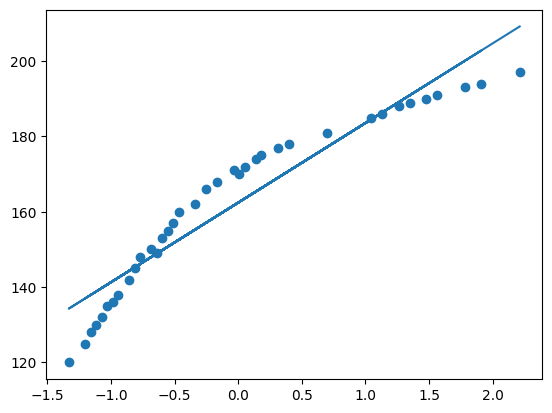

In [36]:
plt.scatter(X_train,Y_train)
plt.plot(X_train,regression.predict(X_train))

In [37]:
## prediction for test data
y_pred = regression.predict(X_test)

In [38]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [39]:
mse = mean_squared_error(Y_test,y_pred)
mae = mean_absolute_error(Y_test,y_pred)
rmse=np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

53.680114887036694
6.3816221266864614
7.326671473939356


In [40]:
from sklearn.metrics import r2_score


In [43]:
score = r2_score(Y_test,y_pred)
print(score)

0.8422984491202378


In [44]:
#display adjuster R-squered
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.8279619444948049

In [45]:
## OLS linear regression

In [46]:
import statsmodels.api as sm

In [47]:
model = sm.OLS(Y_train,X_train).fit()

In [48]:
prediction = model.predict(X_test)
print(prediction)

[ 17.52841512  49.49925677  10.22079417 -15.35587916  35.79746749
  -8.96171083  -4.39444773  -8.04825821  19.35532035  44.93199368
  12.96115202 -19.00968963  42.19163582]


In [49]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.017
Model:                            OLS   Adj. R-squared (uncentered):             -0.011
Method:                 Least Squares   F-statistic:                             0.6085
Date:                Thu, 01 May 2025   Prob (F-statistic):                       0.440
Time:                        21:48:43   Log-Likelihood:                         -240.87
No. Observations:                  37   AIC:                                      483.7
Df Residuals:                      36   BIC:                                      485.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [51]:
## prediction for new data
regression.predict(scaler.transform([[72]]))

c:\Users\szymo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([163.51870041])